# Time Series Analytics Homework #9
Name: Dhanabordee Mekintharanggur

Student ID: T11902203

## Note
- Although this notebook is a .ipynb notebook, the code is written and executed in R language.

In [11]:
install.packages('astsa')
install.packages('GENEAread')
install.packages('TSA')
install.packages('seewave')
install.packages('GENEAread')
install.packages('astsa')
install.packages('ContourFunctions')

library(astsa)
library(GENEAread)
library(graphics)
library(TSA)
library(seewave)
library(GENEAread)
library(astsa)
library(ContourFunctions)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [129]:
options(repr.plot.width=12, repr.plot.height=8)

# 1. (20%) Simulate three random variables with length 1024, following standard Normal, 𝑡-distribution (𝑑𝑓 = 10), and exponential distribution (rate = 1.6), respectively.

### (a) Perform FFT (Fast Fourier Transform) over the three random variables and plot the amplitudes.

**Simulate Standard Normal Distribution with length 1024**

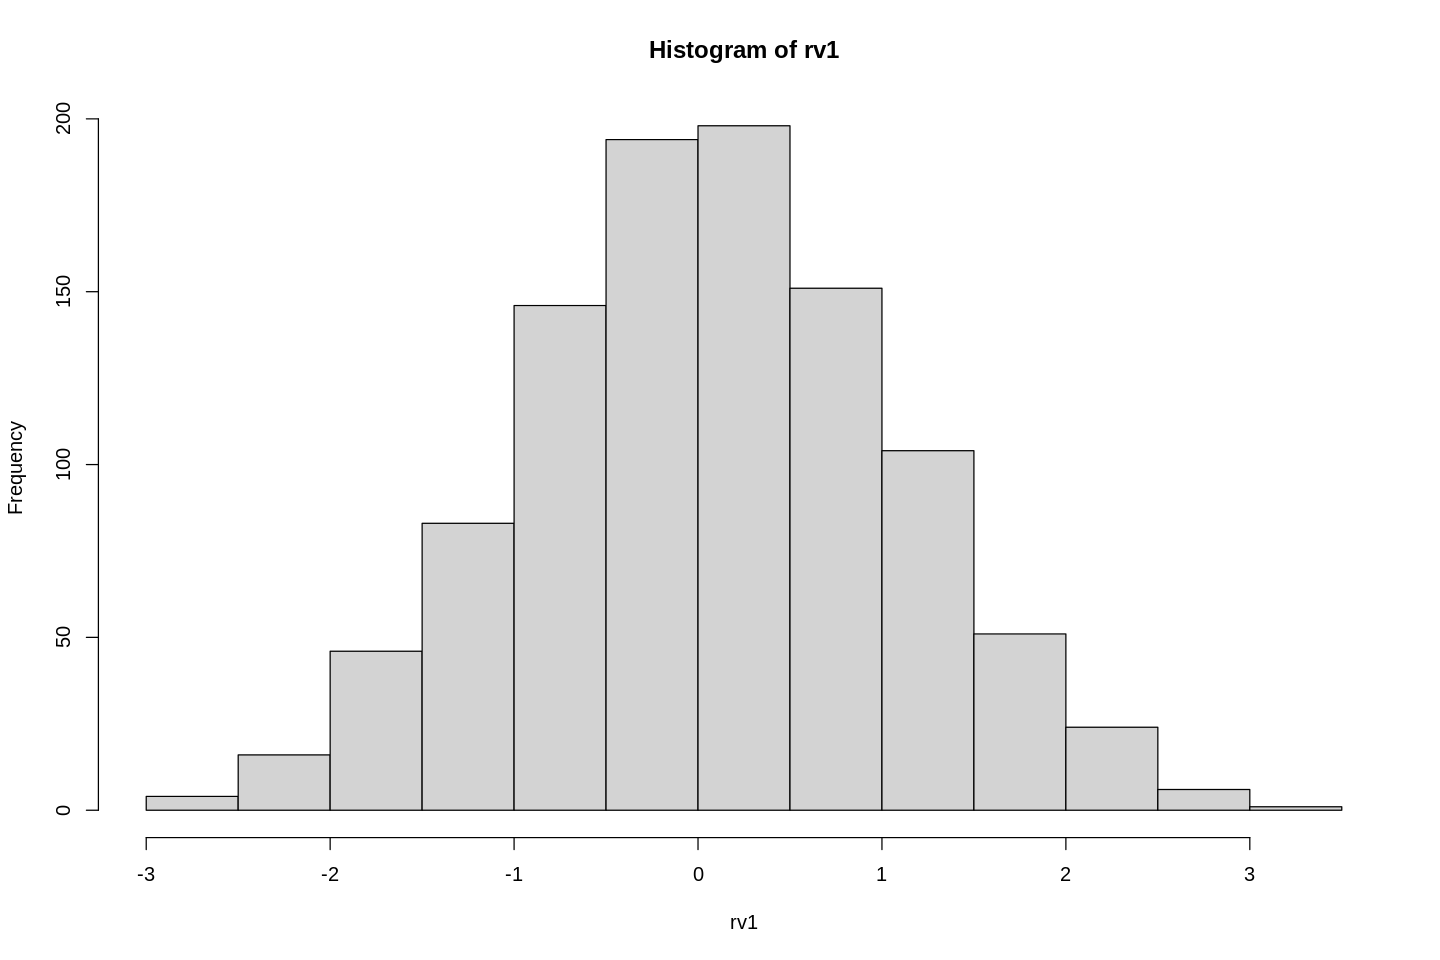

In [130]:
# Standard Normal Distribution
set.seed(2)
rv1=rnorm(1024,mean=0,sd=1)
hist(rv1)

**Perform Fast Fourier Transform and plot the amplitudes**

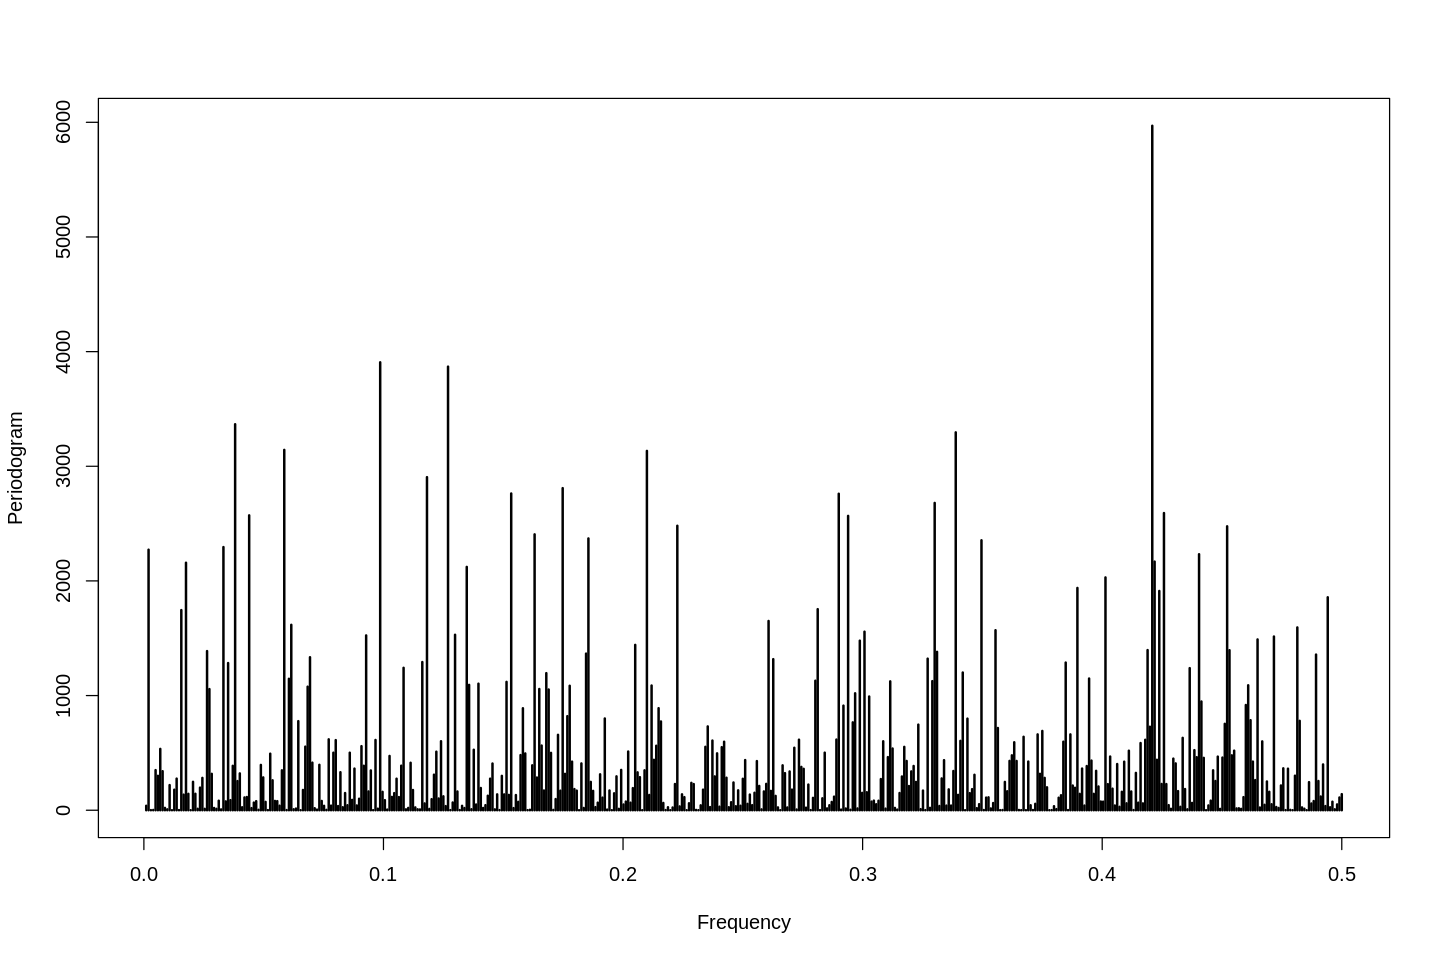

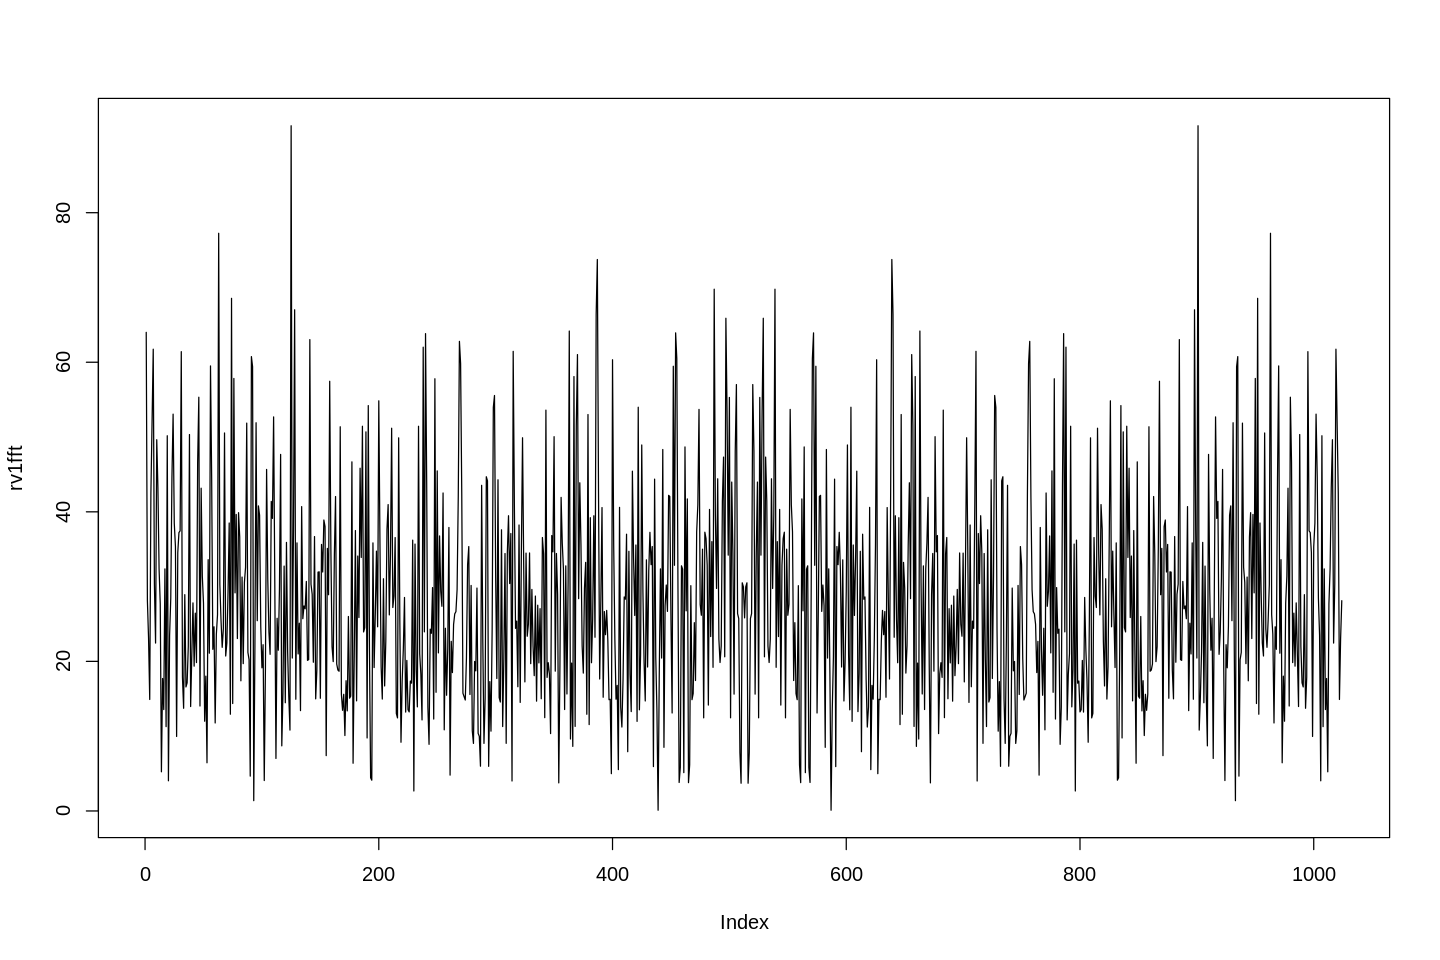

In [131]:
rv1fft = (abs(fft(rv1, inverse = FALSE)))
periodogram(rv1fft)
plot(rv1fft, type="l")

**Simulate t-Distribution (df=10) with length 1024**

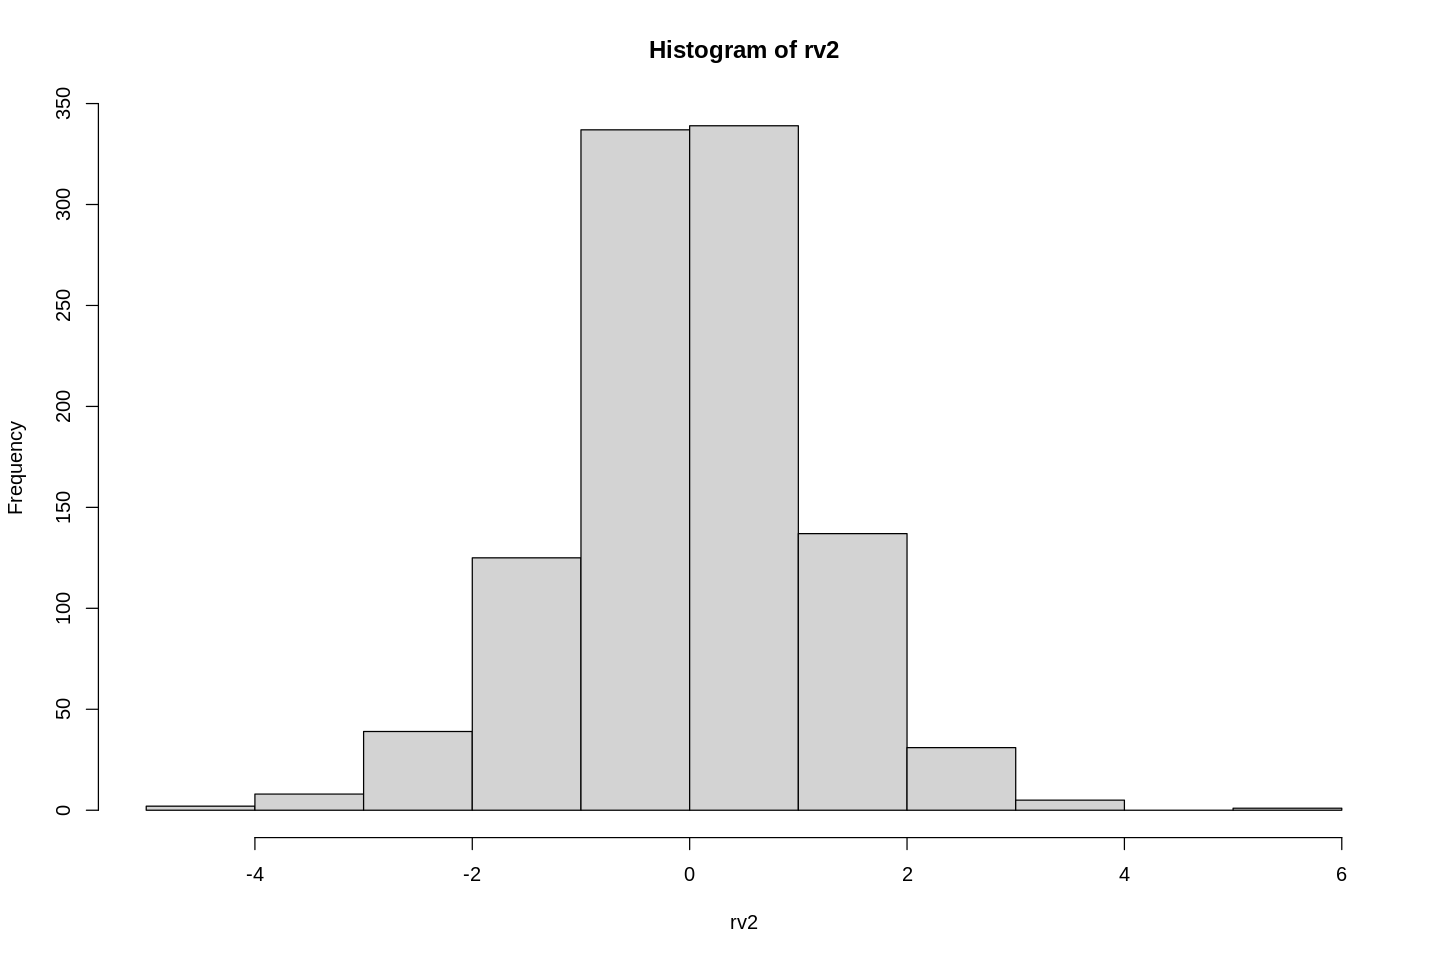

In [132]:
# T-distribution
set.seed(1)
rv2 <- rt(1024, 10)
hist(rv2)

**Perform Fast Fourier Transform and plot the amplitudes**

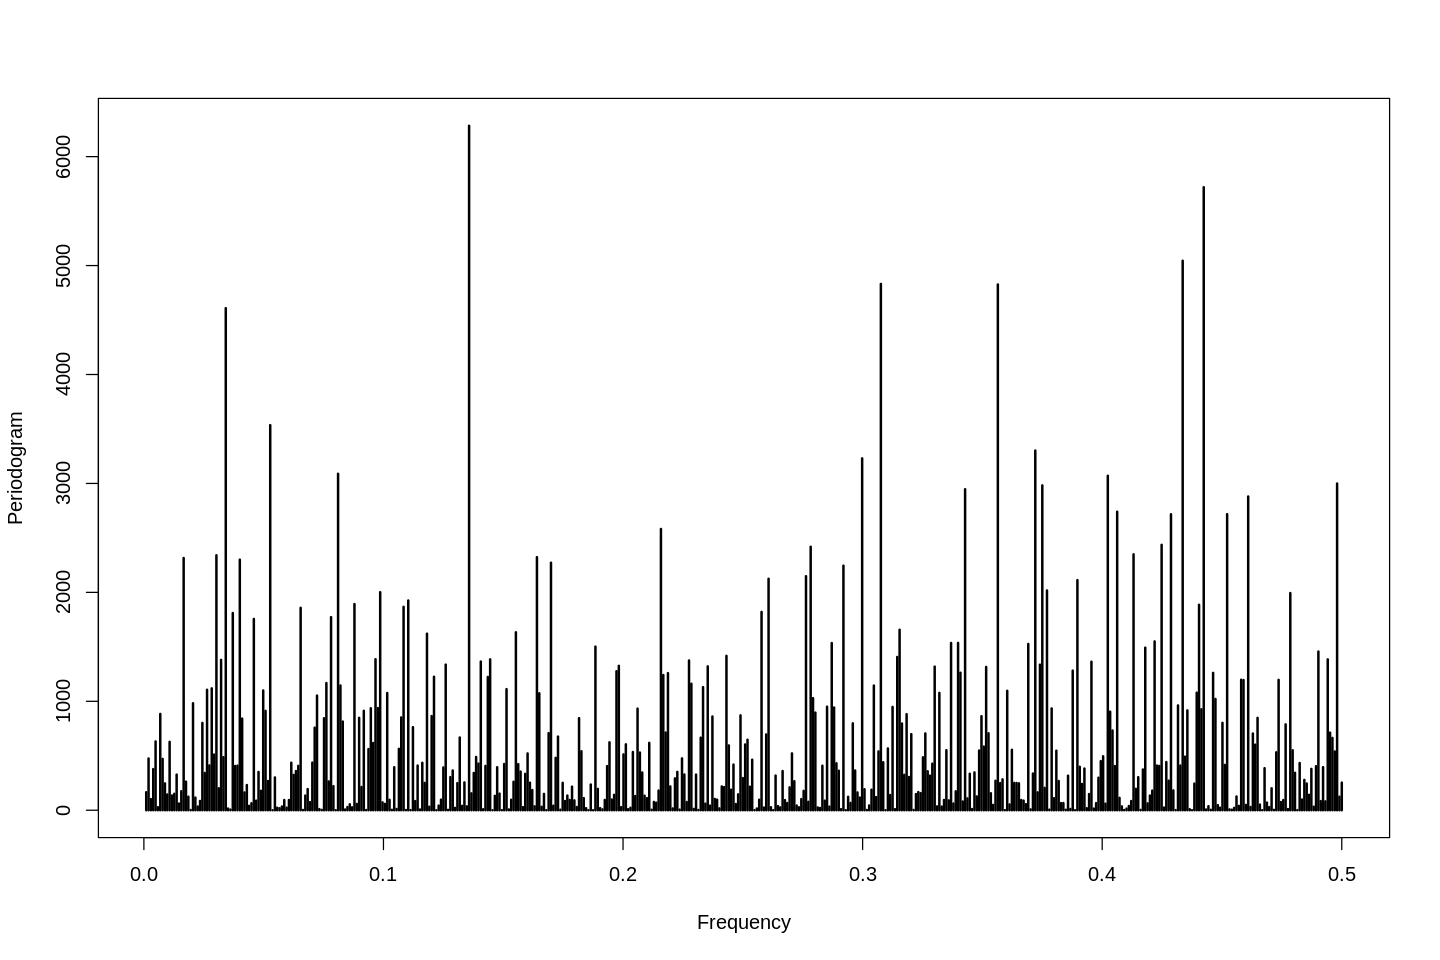

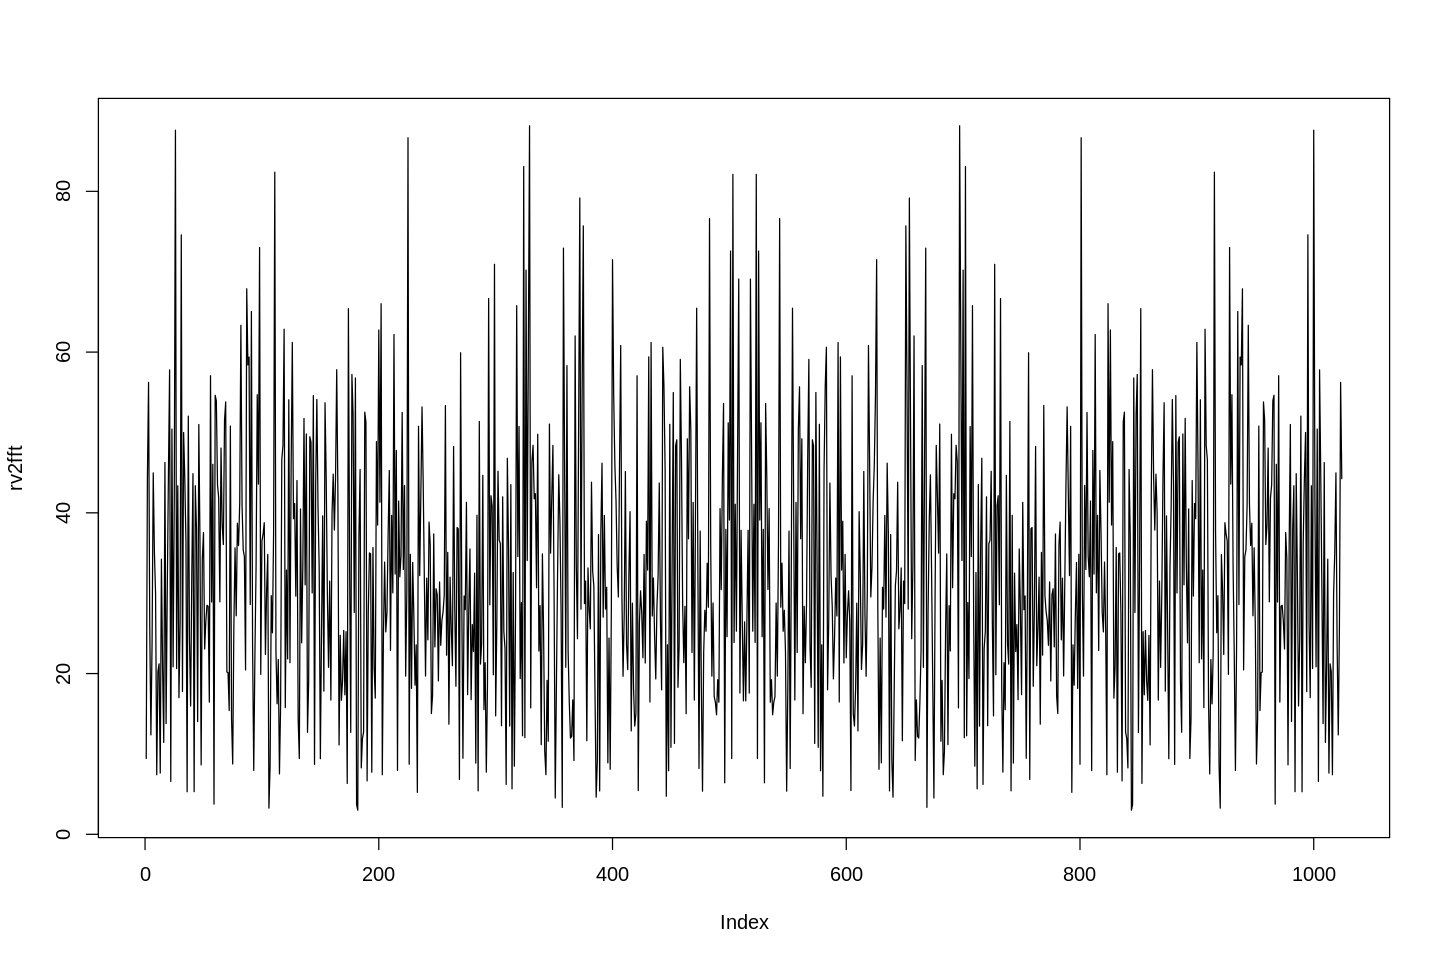

In [133]:
rv2fft = (abs(fft(rv2, inverse = FALSE)))
periodogram(rv2fft)
plot(rv2fft, type="l")

**Simulate Exponential Distribution with length 1024**

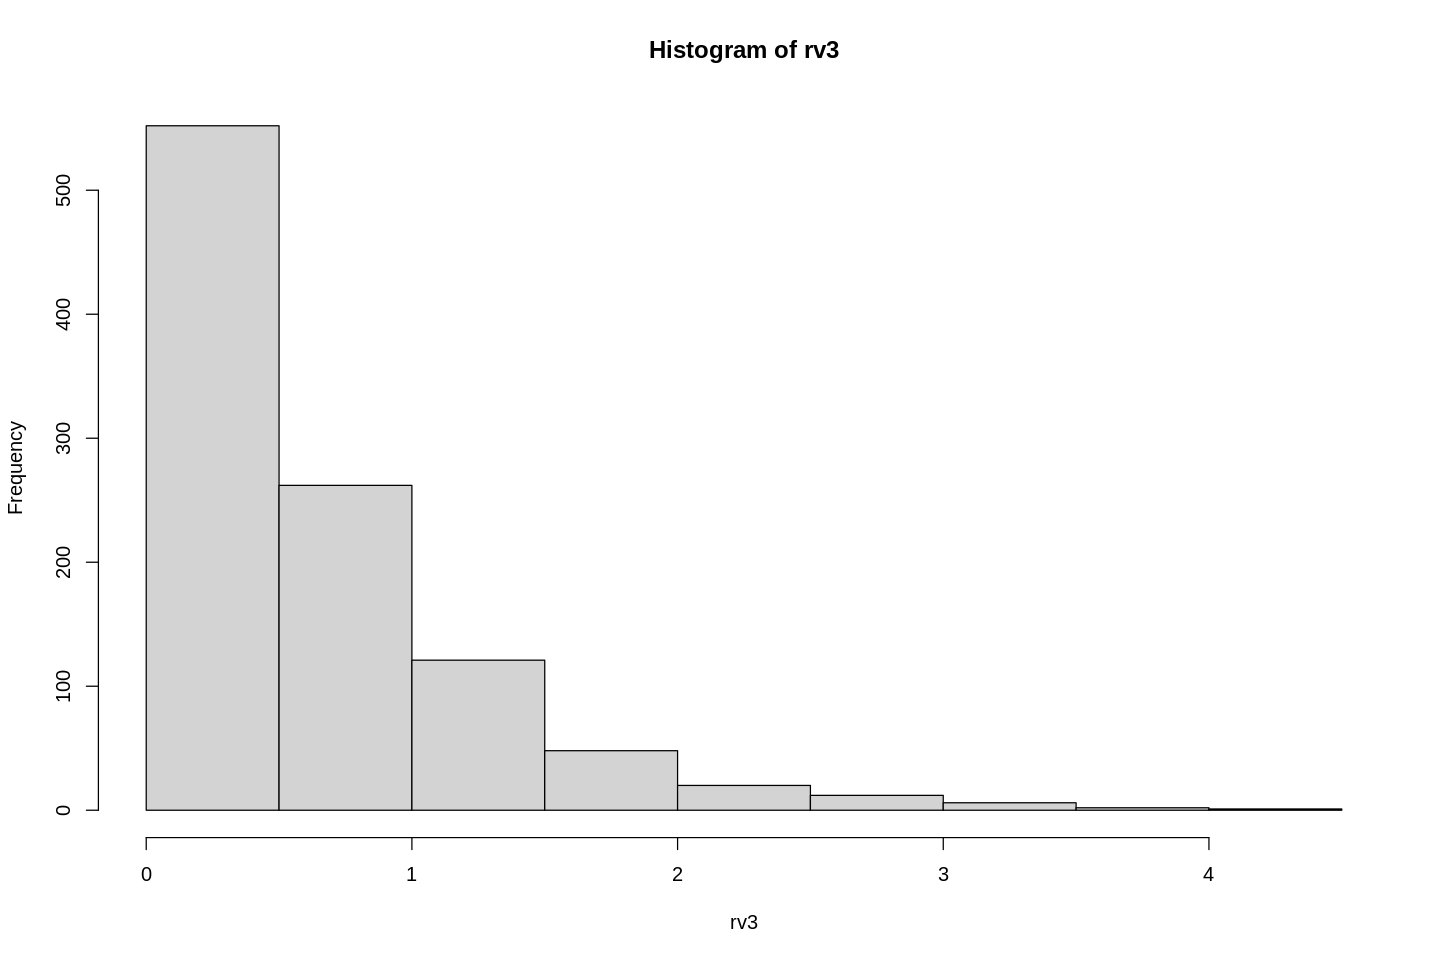

In [134]:
# Exponential Distribution
set.seed(1)
x=seq(from = -10, to = 10, length=1024)
rv3 <- rexp(x, rate = 1.6)
hist(rv3)

**Perform Fast Fourier Transform and plot the amplitudes**

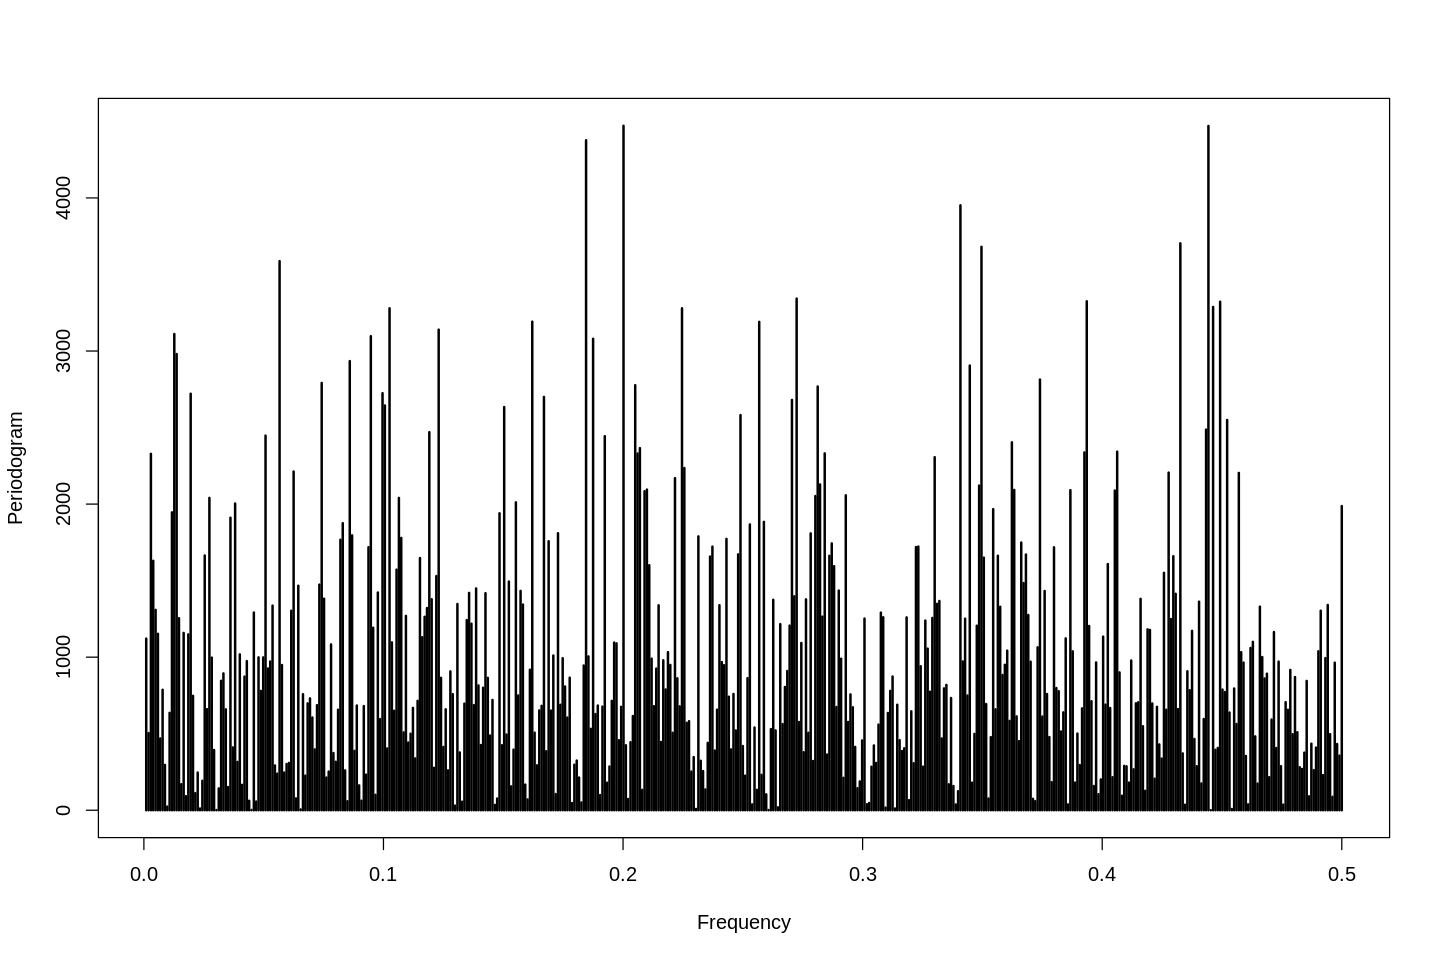

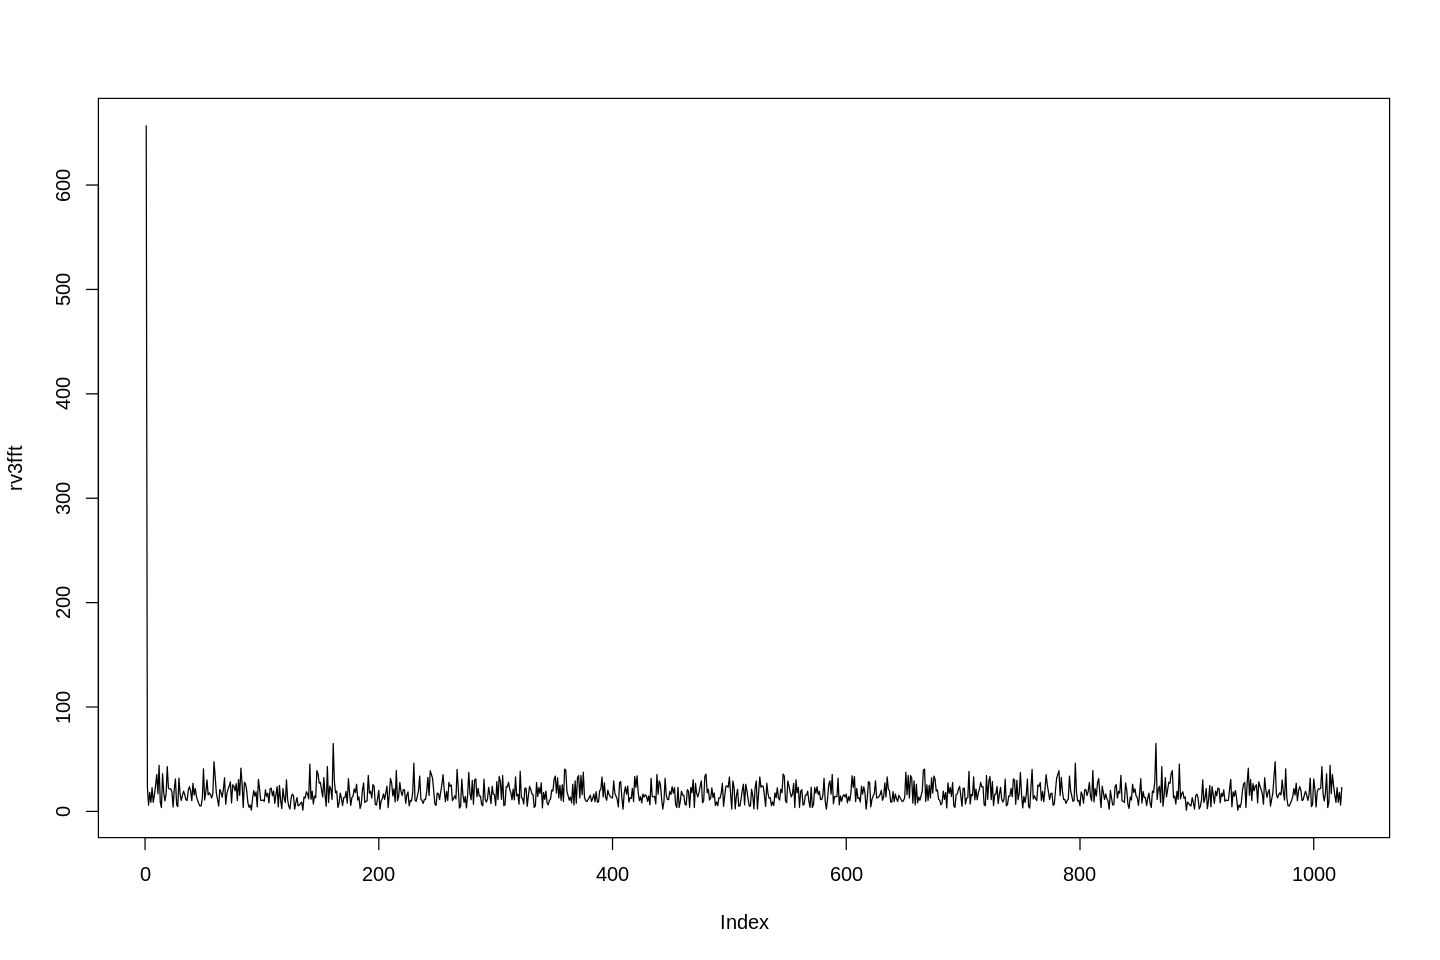

In [135]:
rv3fft = abs(fft(rv3, inverse = FALSE))
periodogram(rv3fft)
plot(rv3fft, type="l")

### (b) Perform STFT (Short-Time Fourier Transform) over the three random variables and plot the time-frequency contours.

**Perform Short-Time Fourier Transform on the Normal Distribution and plot the amplitudes**

STFT object:
70-01-01 00:00:12.000 (Thu)  to  70-01-01 00:16:48.000 (Thu) 
84 increments of 12 s 
Window size:  24 ( 24 s ) -> f resolution:  0.042 Hz

------ 
{ stft(X = rv1, reassign = FALSE, plot.it = TRUE, wtype = "hanning.window",      win = 24) }

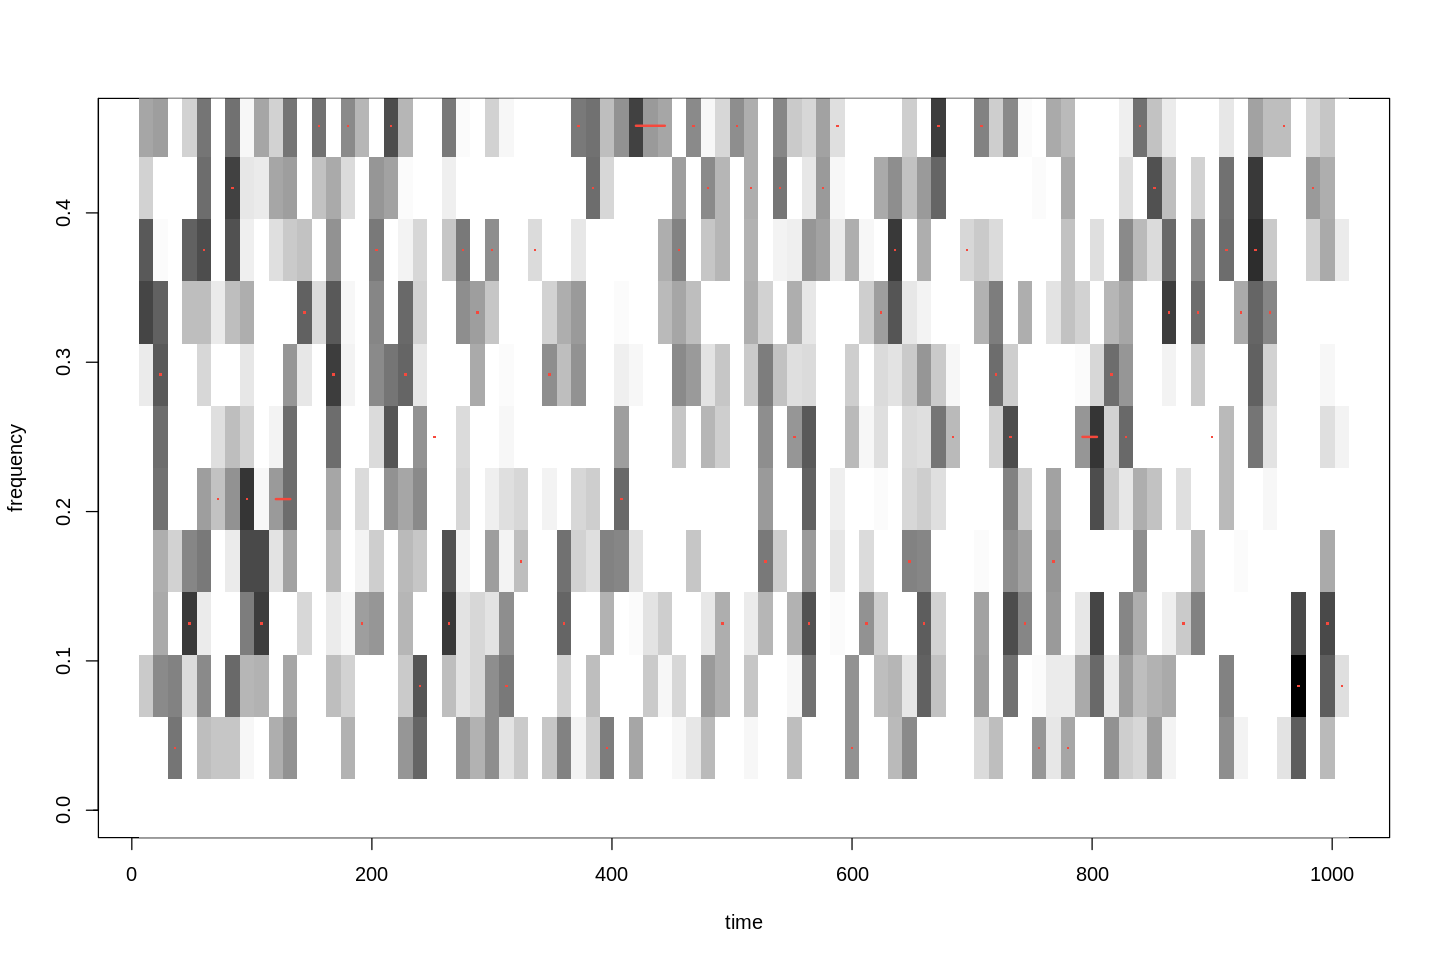

In [136]:
stft(rv1,  plot = TRUE, reassign = FALSE , wtype="hanning.window", win = 24)

**Perform Short-Time Fourier Transform on the T-Distribution and plot the amplitudes**

STFT object:
70-01-01 00:00:12.000 (Thu)  to  70-01-01 00:16:48.000 (Thu) 
84 increments of 12 s 
Window size:  24 ( 24 s ) -> f resolution:  0.042 Hz

------ 
{ stft(X = rv2, reassign = FALSE, plot.it = TRUE, wtype = "hanning.window",      win = 24) }

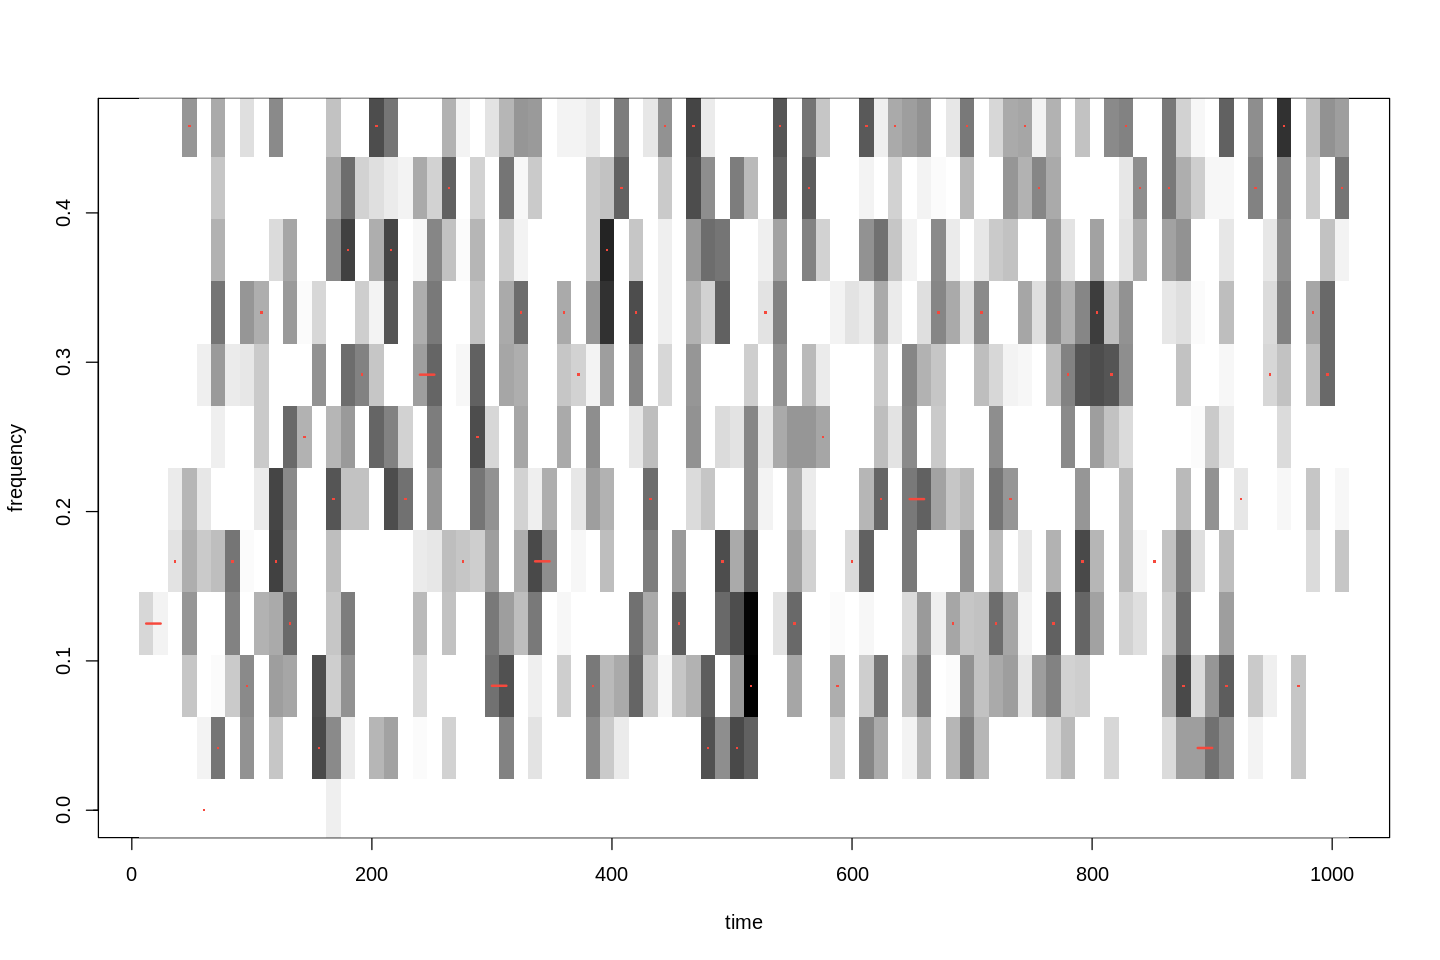

In [137]:
stft(rv2,  plot = TRUE, reassign = FALSE , wtype="hanning.window", win = 24)

**Perform Short-Time Fourier Transform on the Exponential Distribution and plot the amplitudes**

STFT object:
70-01-01 00:00:12.000 (Thu)  to  70-01-01 00:16:48.000 (Thu) 
84 increments of 12 s 
Window size:  24 ( 24 s ) -> f resolution:  0.042 Hz

------ 
{ stft(X = rv3, reassign = FALSE, plot.it = TRUE, wtype = "hanning.window",      win = 24) }

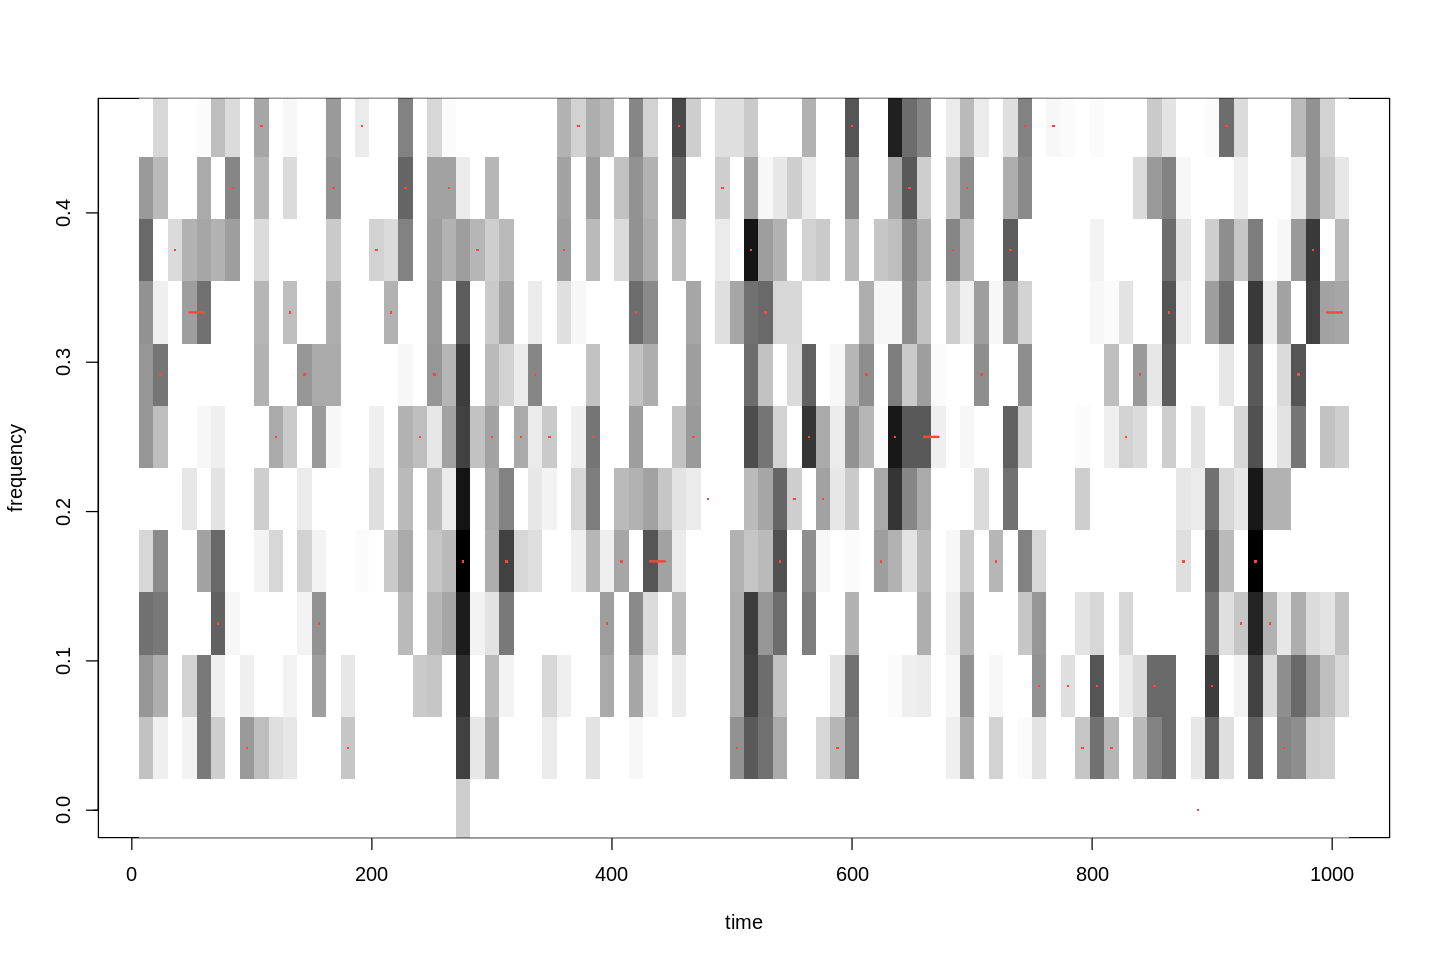

In [138]:
stft(rv3,  plot = TRUE, reassign = FALSE , wtype="hanning.window", win = 24)

### (c) What do you observe in (a) and (b)?

**Part a Discussion**

Evaluating the stationarity of data
- Normal Distribution
  - Based on the histogram of each of the distribution, it can be observed that the mean of the samples is constant at 0
  - Based on the amplitude plot, the symmetry can be observed
  - It can be said that the normal distribution yields stationary data
- T-Distribution
  - Similar to the normal distribution, T-Distribution also produces the data with constant mean at 0
  - Based on the amplitude plot, the symmetry can be observed
  - It can be said that the t-distribution yields stationary data
- Exonential Distribution
  - Unlike the previous 2 distributions, exponential distribution does not produce data that has a constant mean centered at 0.
  - Juding from the amplitude plot, a symmetry cannot be observed as well.
  - The amplitude plot shows a very high amlpitude at the first frequency, which is disproportionately higher than at other frequencies. 
  - Thus, exponential distribution yields non-stationary data 

**Part b Discussion**

- Using the `stft()` function from the GENEAread libary, the short-time fourier transform is conducted.
- The resulting plot is a time-frequency plot with time in the x-axis and frequency in the y axis.
- The plot shows the black lines that represent the frequency and time areas where there is significant energy present.
- The darker the line, the more significant the energy presence is.
- I have adjusted the library's window size from the default of 10 to 24. By increasing the window size, the plot can show a better frequency resolution. 

- The normal distribution and t-distribution shows a similar time-frequency contour plot with roughly the same intensity of energy significance as denoted by the dark parts of the plot.

- The exponential distribution shows a slightly lighter tone to the plot, suggesting that there are less areas where the freqencies are significant.
- This could be attributed to the fact that the exponentially distributed data is not stationary

These conclusions can be made based on the observations of the amplitude plots of fast fourier transform and the short-time fourier trnasform. However, it is arguable that despite being able to make conclusions based on the observations, the STFT plots are not very clearly defined.


# 2. (20%) Simulate a seasonal time series following the model SARIMA(2, 1, 0) × (0, 1, 1)12.

### (a) Perform FFT (Fast Fourier Transform) over the time series and plot the amplitudes.

**Simulate a seasonal time series following the model $SARIMA(2,1,0) x (0,1,1)_{12}$**

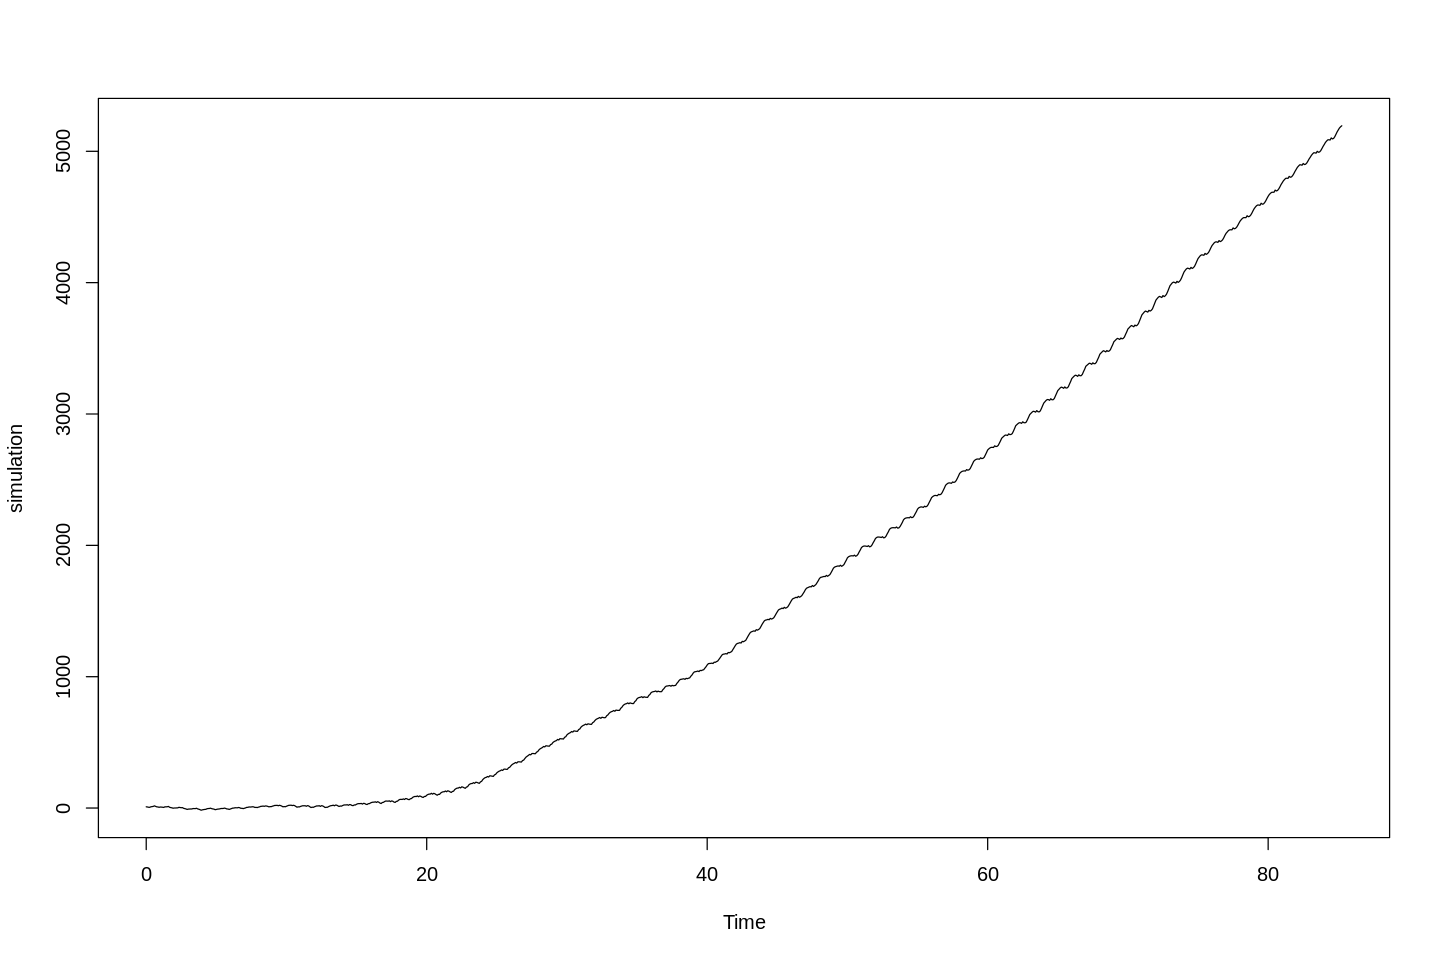

In [139]:
set.seed(2)
simulation <- sarima.sim(ar=c(0.2, 0.1), d = 1, ma = NULL, sar = NULL, D = 1, sma = c(0.1), S = 12, n = 1024)
plot(simulation)

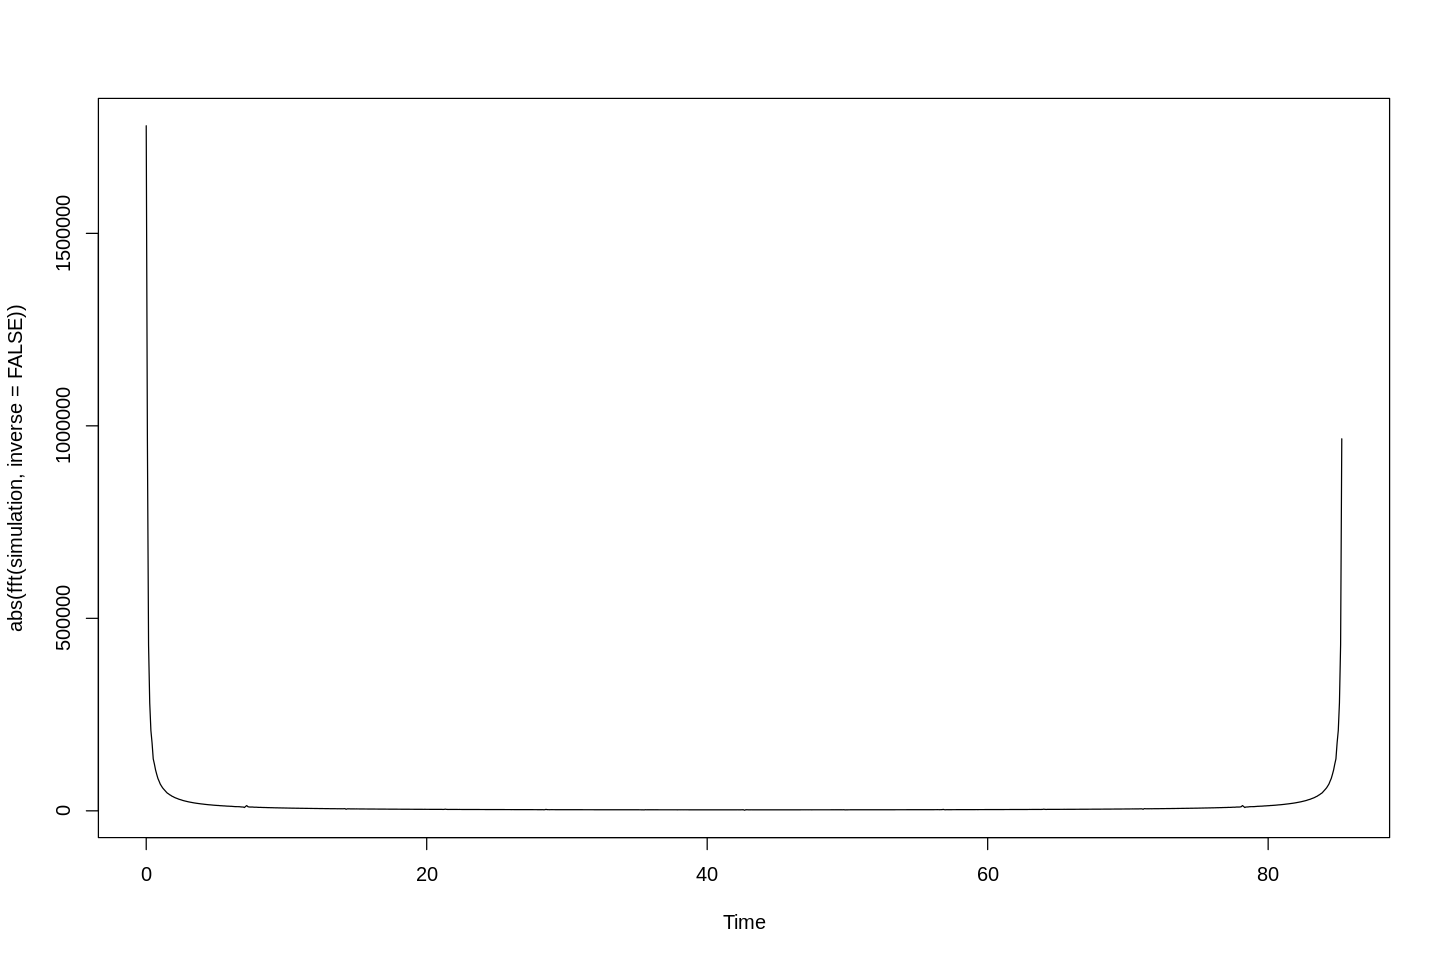

In [140]:
plot(abs(fft(simulation, inverse = FALSE)))

### (b) Perform STFT (Short-Time Fourier Transform) over the time series and plot the time-frequency contours.

STFT object:
70-01-01 00:00:12.000 (Thu)  to  70-01-01 00:16:48.000 (Thu) 
84 increments of 12 s 
Window size:  24 ( 24 s ) -> f resolution:  0.042 Hz

------ 
{ stft(X = simulation, reassign = FALSE, plot.it = TRUE, wtype = "hanning.window",      win = 24) }

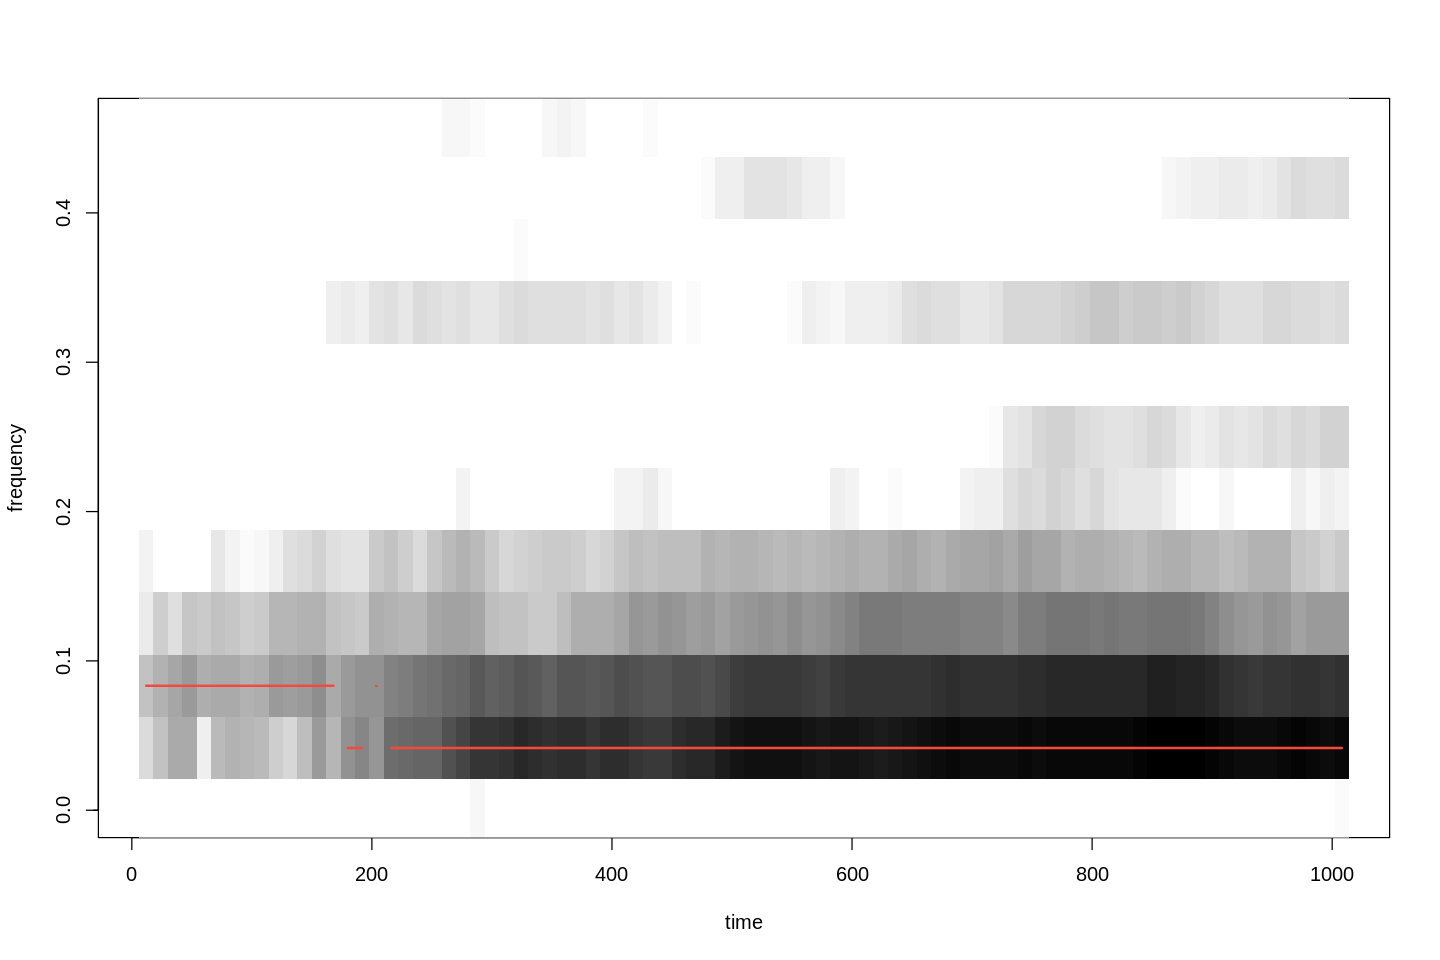

In [141]:
stft(simulation,  plot = TRUE, reassign = FALSE, wtype="hanning.window", win = 24)

### (c) What do you observe in (a) and (b)?

**Part a Discussion**

- using the `sarima.sim` function with specified p, d, q, P, D, Q values with each season lasting 12 periods, the SARIMA model can be simulated.

- the plot shows a consistent upward trend as time increases with some seasonal patterns alongs its way.
- Thus, it can be said that the SARIMA simulation is not stationary.

- from the amplitude plot of the SARIMA simulation that underwent a fast fourier transform, the amplitude is especially high during the timing of the first and the last season when compared to the amplitudes at the other times.

**Part b Discussion**

The power spectrogram achieved by doing a short-time fourier transform paints a much clearer of the significant frequencies of the SARIMA simulated data than the ones from the normal distribution, t-distribution, and exponential distribution in question 1.

While the distributions in question has less defined time-frequeny contours, the existence of dark areas across the plot suggests that are are many significant frequencies.

In the SARIMA model, however, the time-frequency contours are very viisbly defined. Since the `stft` function plots the area of significant frequencies using darker shades of black, it can be inferred that there is clearly higher energy (important frequencies) towards the lower frequency areas at the lower part of the plot. 

The plot is wideband, meaning that it shows higher frequency resolution at the sacrifice of the time resolution. The wideband is used for the detection of low-frequency energy significance, which matches the model here.

All in all, the power spectogram from the short-time fourier transform has proven to be useful in determining the significant frequencies.

When comparing the SARIMA model to the normal distribution and t-distribution, it can be inferred that fewer range of ferquencies are considered as significant. 

